# Assessment 3 - Regression Calculations

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

### Load Data from `pepsi-csv.csv`

In [114]:
data = pd.read_csv('pepsi-csv.csv')
data = data.drop('Unnamed: 5', axis=1)
data = data.dropna()
#data = data.drop(labels=12, axis=0)
#data = data.drop(labels=11, axis=0)
data

,year,annual dividend,log(annual dividend),time,time2
0,2010.0,0.86,-0.0635,1.0,1.0
1,2011.0,0.96,-0.0177,2.0,4.0
2,2012.0,1.06,0.0237,3.0,9.0
3,2013.0,1.20,0.0792,4.0,16.0
4,2014.0,1.34,0.1284,5.0,25.0
5,2015.0,1.49,0.1726,6.0,36.0
6,2016.0,1.63,0.2127,7.0,49.0
7,2017.0,1.82,0.2610,8.0,64.0
8,2018.0,1.97,0.2940,9.0,81.0
9,2019.0,2.11,0.3247,10.0,100.0


### Assign Dependent and Independent Variables

In [115]:
x = data['time'] # Independent variable
y = data['annual dividend'] # Dependent variable

### Scatter Plot for Linear Regression Data

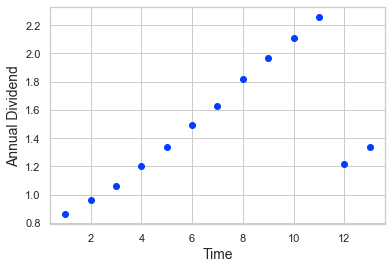

In [116]:
sns.set_theme(style='whitegrid', palette='bright')
plt.scatter(x,y)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Annual Dividend', fontsize = 14)
plt.show()

### Regression Plot for Linear Regression Data

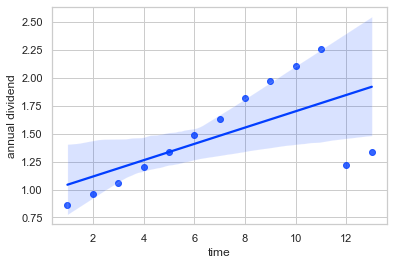

In [117]:
sns.regplot(data=data, x='time', y='annual dividend')

### Linear Regression Analysis

The simple linear regression equation is: $y = -145.84 + 0.07x $

In [118]:
import warnings
warnings.filterwarnings('ignore') # Ignore the n>20 warning as the sample size is under 20

x_c = sm.add_constant(x) # create constant value from x
results = sm.OLS(y,x_c).fit() # create OLS regression model
results.summary() # display results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        annual dividend   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     7.487
Date:                Fri, 05 Aug 2022   Prob (F-statistic):             0.0194
Time:                        17:05:25   Log-Likelihood:                -4.0900
No. Observations:                  13   AIC:                             12.18
Df Residuals:                      11   BIC:                             13.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9700      0.212      4.576      0.001       0.503       1.437
time           0.0731      0.027      2.736      0.019       0.014       0.132
==============================================================================
Omnibus:                        0.712   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.628
Skew:                          -0.439   Prob(JB):                        0.730
Kurtosis:                       2.376   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Simple Linear Equation

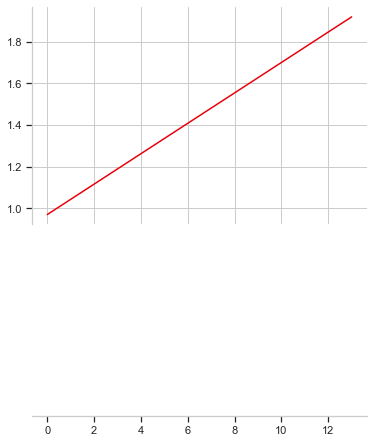

In [119]:
x_lin = np.linspace(0,13,100)

# $y = -145.84 + 0.07x $
# the function, which is y = -145.84 + 0.07time here
y_eq = 0.97 + (0.0731 * x_lin)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x_lin, y_eq, 'r')

# show the plot
plt.show()

### Quadratic Trend Regression
Get the time and time-squared data from the dataframe, to be used for multiple linear regression. 
Then apply multiple linear regression.
The quadratic regression equation is: $ y = 0.33 + 0.328x - 0.018x2 $

In [120]:
x_time = data[["time", "time2"]] # Independent variable
x_c2 = sm.add_constant(x_time)
results2 = sm.OLS(y,x_c2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        annual dividend   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     10.72
Date:                Fri, 05 Aug 2022   Prob (F-statistic):            0.00325
Time:                        17:05:26   Log-Likelihood:              -0.018487
No. Observations:                  13   AIC:                             6.037
Df Residuals:                      10   BIC:                             7.732
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3322      0.270      1.229      0.247      -0.270       0.935
time           0.3282      0.089      3.694      0.004       0.130       0.526
time2         -0.0182      0.006     -2.951      0.015      -0.032      -0.004
==============================================================================
Omnibus:                        1.117   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.555
Skew:                           0.493   Prob(JB):                        0.758
Kurtosis:                       2.771   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot The Quadratic Equation

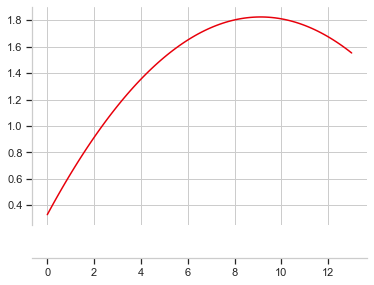

In [121]:
x_quad = np.linspace(0,13,100)

# the function, which is y = 0.33 + 0.328time - 0.018time2 here
y_eq = 0.33 + (0.328 * x_quad) - (0.018 * x_quad**2)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x_quad, y_eq, 'r')

# show the plot
plt.show()

### Exponential Trend Regression
Use the log of y, in this case `log(annual dividend)`, to produce the exponential trend regression.
The exponential regression equation is: $ y = -0.215 + 0.106x - 0.006x2 $ 

In [122]:
y_log = data["log(annual dividend)"]
x_c3 = sm.add_constant(data['time'])
results3 = sm.OLS(y_log,x_c3).fit()
results3.summary()
#b0, #b1
# auto regression...
#x_auto = [data['lag3'],data['lag2'],data['lag1']]

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     log(annual dividend)   R-squared:                       0.454
Model:                              OLS   Adj. R-squared:                  0.404
Method:                   Least Squares   F-statistic:                     9.150
Date:                  Fri, 05 Aug 2022   Prob (F-statistic):             0.0116
Time:                          17:05:26   Log-Likelihood:                 12.344
No. Observations:                    13   AIC:                            -20.69
Df Residuals:                        11   BIC:                            -19.56
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.060     -0.118      0.908      -0.139       0.125
time           0.0228      0.008      3.025      0.012       0.006       0.039
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                1.162
Skew:                          -0.602   Prob(JB):                        0.559
Kurtosis:                       2.167   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Show the dividend increase
b = 10 ** 0.0228
print(b-1)

0.05390144506916017


### Plot The Exponential Equation

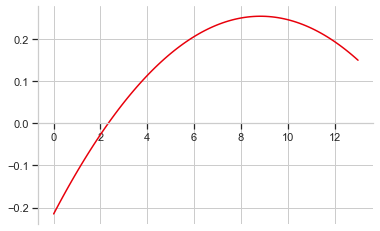

In [124]:
x_exp = np.linspace(0,13,100)

# the function, which is y = -0.215 + 0.106time - 0.006time2 here
y_eq2 = -0.215 + (0.106 * x_exp) - (0.006 * x_exp**2)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x_exp, y_eq2, 'r')

# show the plot
plt.show()